## Necessary Imports

In [18]:
# Necessary imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import np_utils
import pickle
import numpy as np
from sklearn.metrics import classification_report

## Reading the data

In [3]:
# Reading the crop dataset
crop_data_df = pd.read_csv('../datasets/crop_recommendation_data.csv')
crop_data_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## Initial data checks

In [4]:
crop_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
N              2200 non-null int64
P              2200 non-null int64
K              2200 non-null int64
temperature    2200 non-null float64
humidity       2200 non-null float64
ph             2200 non-null float64
rainfall       2200 non-null float64
label          2200 non-null object
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


#### No null values present

In [5]:
# unique labeles present
crop_data_df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [6]:
crop_data_df['label'].value_counts()

coffee         100
papaya         100
watermelon     100
jute           100
pigeonpeas     100
banana         100
maize          100
lentil         100
pomegranate    100
orange         100
blackgram      100
mothbeans      100
grapes         100
mungbean       100
coconut        100
kidneybeans    100
chickpea       100
muskmelon      100
apple          100
mango          100
rice           100
cotton         100
Name: label, dtype: int64

#### Hence, data imbalance is not present

## Data Analysis

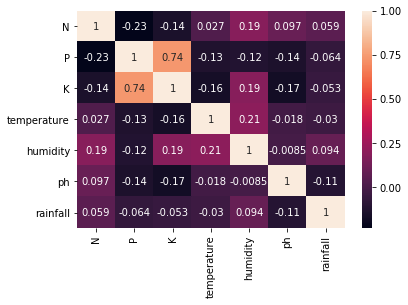

In [7]:
# Checking the data correlations
sns.heatmap(crop_data_df.corr(),annot=True)
plt.show()

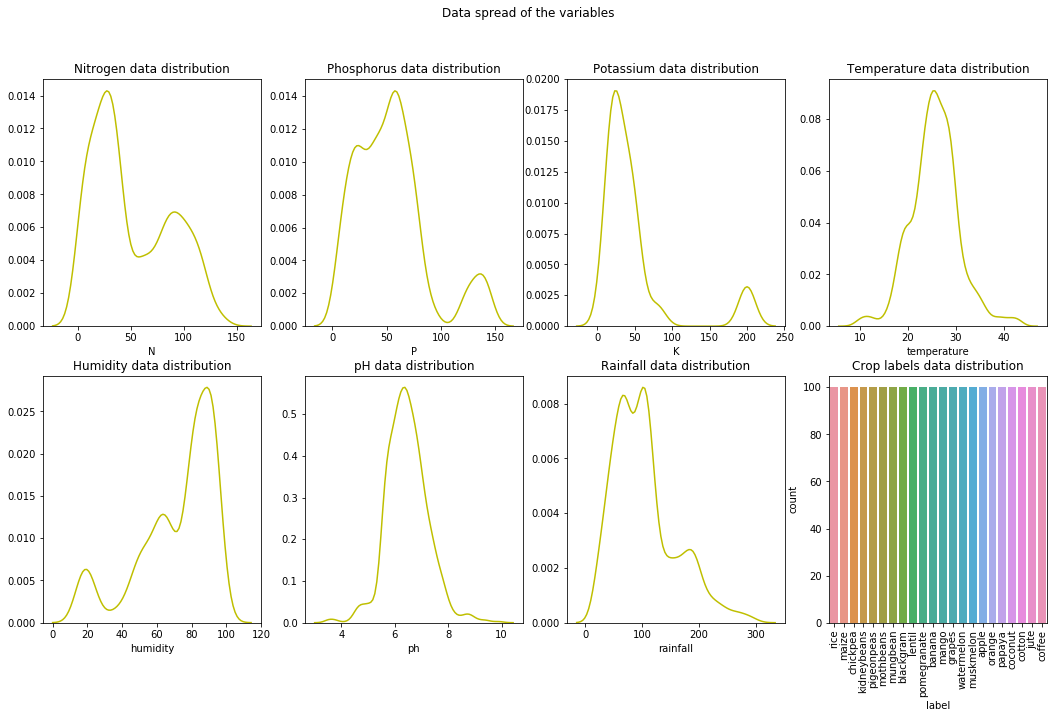

In [8]:
# Checking the data spread of predictor variables
fig, axes = plt.subplots(2, 4, figsize=(18, 10))

fig.suptitle('Data spread of the variables')

sns.distplot(crop_data_df['N'], hist=False,  color="y", ax=axes[0, 0])
axes[0, 0].set_title('Nitrogen data distribution')

sns.distplot(crop_data_df['P'], hist=False, color="y", ax=axes[0, 1])
axes[0, 1].set_title('Phosphorus data distribution')

sns.distplot(crop_data_df['K'], hist=False, color="y", ax=axes[0, 2])
axes[0, 2].set_title('Potassium data distribution')

sns.distplot(crop_data_df['temperature'], hist=False, color="y", ax=axes[0, 3])
axes[0, 3].set_title('Temperature data distribution')

sns.distplot(crop_data_df['humidity'], hist=False, color="y", ax=axes[1, 0])
axes[1, 0].set_title('Humidity data distribution')

sns.distplot(crop_data_df['ph'], hist=False, color="y", ax=axes[1, 1])
axes[1, 1].set_title('pH data distribution')

sns.distplot(crop_data_df['rainfall'], hist=False, color="y", ax=axes[1, 2])
axes[1, 2].set_title('Rainfall data distribution')

chart = sns.countplot(crop_data_df['label'], ax=axes[1, 3])
axes[1, 3].set_title('Crop labels data distribution')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

plt.show()

In [9]:
# Splitting features and targets
X = crop_data_df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
y = crop_data_df['label']

In [10]:
# Encoding the label data
encoder = LabelEncoder()
y = encoder.fit_transform(y)
# Transforming to array of categorical data
y = np_utils.to_categorical(y)
# Storing the mapping data
le_name_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
with open('../models/crop_mappings_data.p', 'wb') as fp:
    pickle.dump(le_name_mapping, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [11]:
# Performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

## Model Building

In [12]:
# Neural network layers
model = Sequential()
model.add(Dense(15, input_dim = 7, activation = 'relu')) # Rectified Linear Unit Activation Function
model.add(Dense(15, activation = 'relu'))
model.add(Dense(22, activation = 'softmax')) # Softmax for multi-class classification
# Model compilation
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [13]:
# Training the model
model.fit(X_train.values, y_train, epochs=10, batch_size = 2)

Epoch 1/10
770/770 [==============================] - 2s 989us/step - loss: 20.7022 - accuracy: 0.1351
Epoch 2/10
770/770 [==============================] - 1s 962us/step - loss: 1.5607 - accuracy: 0.4967
Epoch 3/10
770/770 [==============================] - 1s 1ms/step - loss: 0.9690 - accuracy: 0.6612
Epoch 4/10
770/770 [==============================] - 1s 1ms/step - loss: 0.6875 - accuracy: 0.7439
Epoch 5/10
770/770 [==============================] - 1s 1ms/step - loss: 0.5104 - accuracy: 0.8156
Epoch 6/10
770/770 [==============================] - 1s 992us/step - loss: 0.4189 - accuracy: 0.8336
Epoch 7/10
770/770 [==============================] - 1s 947us/step - loss: 0.4005 - accuracy: 0.8492
Epoch 8/10
770/770 [==============================] - 1s 964us/step - loss: 0.3067 - accuracy: 0.8833
Epoch 9/10
770/770 [==============================] - 1s 982us/step - loss: 0.3007 - accuracy: 0.88000s - los
Epoch 10/10
770/770 [==============================] - 1s 945us/step - loss: 0.

In [19]:
# Model testing and Evaluation
y_pred_idx = model.predict(X_test)
y_pred = np.argmax(y_pred_idx, axis=1)
print(classification_report(np.argmax(y_test, axis=1), y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      0.97      0.98        31
           2       0.67      0.64      0.65        28
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00        35
           5       0.97      1.00      0.98        32
           6       0.87      0.84      0.85        31
           7       1.00      1.00      1.00        30
           8       0.94      0.88      0.91        33
           9       0.91      1.00      0.96        32
          10       0.74      0.88      0.81        33
          11       0.74      0.88      0.80        32
          12       0.97      1.00      0.98        28
          13       0.71      0.39      0.50        31
          14       0.83      1.00      0.91        29
          15       1.00      0.78      0.88        27
          16       1.00      1.00      1.00        27
          17       1.00    

In [14]:
# Saving the model
model.save("../models/crop_prediction_model.h5")